In [1]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer



In [3]:
X = ["Jim and Pam traveled by the bus", "The bus was late.", "The bus was full. Traveling by bus is expensive.", 'bus bus bus', 'the bus bus is awesome']

#using the count vectorizer
count = CountVectorizer()
word_count=count.fit_transform(X)
print(word_count.shape)
print(word_count.toarray())

(5, 14)
[[1 0 1 1 0 0 0 1 0 1 1 1 0 0]
 [0 0 1 0 0 0 0 0 1 0 1 0 0 1]
 [0 0 2 1 1 1 1 0 0 0 1 0 1 1]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 2 0 0 0 1 0 0 0 1 0 0 0]]


In [4]:
df_CV = pd.DataFrame( word_count.toarray(), columns=count.get_feature_names_out())
df_CV

,and,awesome,bus,by,expensive,full,is,jim,late,pam,the,traveled,traveling,was
0,1,0,1,1,0,0,0,1,0,1,1,1,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
2,0,0,2,1,1,1,1,0,0,0,1,0,1,1
3,0,0,3,0,0,0,0,0,0,0,0,0,0,0
4,0,1,2,0,0,0,1,0,0,0,1,0,0,0


In [5]:
# Term frequency

words_in_docs = df_CV.sum(axis=1).astype(float)
d = {}
for ix, row in df_CV.iterrows():
    a = df_CV.iloc[ix] / words_in_docs[ix]
    d[ix] = a

pd.DataFrame(d).T.round(2)

,and,awesome,bus,by,expensive,full,is,jim,late,pam,the,traveled,traveling,was
0,0.14,0.0,0.14,0.14,0.00,0.00,0.00,0.14,0.00,0.14,0.14,0.14,0.00,0.00
1,0.00,0.0,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.25
2,0.00,0.0,0.22,0.11,0.11,0.11,0.11,0.00,0.00,0.00,0.11,0.00,0.11,0.11
3,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.2,0.40,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.20,0.00,0.00,0.00


In [8]:
# Just IDF weights
from sklearn.feature_extraction.text import TfidfVectorizer
X = ["Jim and Pam traveled by the bus", "The bus was late.", "The bus was full. Traveling by bus is expensive.", 'bus bus bus', 'the bus bus is awesome']

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
vectorizer.idf_

df_idf = pd.DataFrame(vectorizer.idf_).T
df_idf.columns = vectorizer.get_feature_names_out()
df_idf = df_idf.T
df_idf.columns = ['idf_weight']
df_idf

,idf_weight
and,2.098612
awesome,2.098612
bus,1.000000
by,1.693147
expensive,2.098612
full,2.098612
is,1.693147
jim,2.098612
late,2.098612
pam,2.098612


In [13]:
# Full TFIDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
X = ["Jim and Pam traveled by the bus", "The bus was late.", "The bus was full. Traveling by bus is expensive.", 'bus bus bus', 'the bus bus is awesome']

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

df_tfidf = pd.DataFrame(X.toarray(), columns=count.get_feature_names_out())
df_tfidf.round(3)

,and,awesome,bus,by,expensive,full,is,jim,late,pam,the,traveled,traveling,was
0,0.439,0.00,0.209,0.354,0.000,0.000,0.000,0.439,0.000,0.439,0.247,0.439,0.000,0.000
1,0.000,0.00,0.322,0.000,0.000,0.000,0.000,0.000,0.675,0.000,0.380,0.000,0.000,0.545
2,0.000,0.00,0.383,0.325,0.402,0.402,0.325,0.000,0.000,0.000,0.227,0.000,0.402,0.325
3,0.000,0.00,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.59,0.562,0.000,0.000,0.000,0.476,0.000,0.000,0.000,0.332,0.000,0.000,0.000


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = ["Jim and Pam traveled by the bus", "The bus was late.", "The bus was full. Traveling by bus is expensive.", 'bus bus bus', 'the bus bus is awesome']

vectorizer = TfidfVectorizer(norm=None)
vectorizer.fit(X)
X = vectorizer.transform(X)


df_tfidf = pd.DataFrame(X.toarray(), columns=count.get_feature_names_out())
df_tfidf

,and,awesome,bus,by,expensive,full,is,jim,late,pam,the,traveled,traveling,was
0,2.098612,0.000000,1.0,1.693147,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612,1.182322,2.098612,0.000000,0.000000
1,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,1.182322,0.000000,0.000000,1.693147
2,0.000000,0.000000,2.0,1.693147,2.098612,2.098612,1.693147,0.000000,0.000000,0.000000,1.182322,0.000000,2.098612,1.693147
3,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,2.098612,2.0,0.000000,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,1.182322,0.000000,0.000000,0.000000


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = ["Jim and Pam traveled by the bus", "The bus was late.", "The bus was full. Traveling by bus is expensive.", 'bus bus bus', 'the bus bus is awesome']

vectorizer = TfidfVectorizer(norm=None, smooth_idf=False)
vectorizer.fit(X)
X = vectorizer.transform(X)


df_tfidf = pd.DataFrame(X.toarray(), columns=count.get_feature_names_out())
df_tfidf

,and,awesome,bus,by,expensive,full,is,jim,late,pam,the,traveled,traveling,was
0,2.609438,0.000000,1.0,1.916291,0.000000,0.000000,0.000000,2.609438,0.000000,2.609438,1.223144,2.609438,0.000000,0.000000
1,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.609438,0.000000,1.223144,0.000000,0.000000,1.916291
2,0.000000,0.000000,2.0,1.916291,2.609438,2.609438,1.916291,0.000000,0.000000,0.000000,1.223144,0.000000,2.609438,1.916291
3,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,2.609438,2.0,0.000000,0.000000,0.000000,1.916291,0.000000,0.000000,0.000000,1.223144,0.000000,0.000000,0.000000


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = ["Jim and Pam traveled by the bus", "The bus was late.", "The bus was full. Traveling by bus is expensive.", 'bus bus bus', 'the bus bus is awesome']

vectorizer = TfidfVectorizer(use_idf=False)
vectorizer.fit(X)
X = vectorizer.transform(X)


df_tfidf = pd.DataFrame(X.toarray(), columns=count.get_feature_names_out())
df_tfidf

,and,awesome,bus,by,expensive,full,is,jim,late,pam,the,traveled,traveling,was
0,0.377964,0.000000,0.377964,0.377964,0.000000,0.000000,0.000000,0.377964,0.0,0.377964,0.377964,0.377964,0.000000,0.000000
1,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.500000,0.000000,0.000000,0.500000
2,0.000000,0.000000,0.603023,0.301511,0.301511,0.301511,0.301511,0.000000,0.0,0.000000,0.301511,0.000000,0.301511,0.301511
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.377964,0.755929,0.000000,0.000000,0.000000,0.377964,0.000000,0.0,0.000000,0.377964,0.000000,0.000000,0.000000


In [8]:
## this part of code was adapted from Analytics Vidhya by Prateek Majumder 
# https://www.analyticsvidhya.com/blog/2021/09/creating-a-movie-reviews-classifier-using-tf-idf-in-python/

X = ["Jim and Pam traveled by the bus", 
     "The bus was late.", 
     "The bus was full. Traveling by bus is expensive.",
    'bus bus bus', 
    'the bus bus is awesome']


#using the count vectorizer
count = CountVectorizer()
word_count=count.fit_transform(X)
print(word_count.shape)

tfidf_transformer=TfidfTransformer()
tfidf_transformer.fit(word_count)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names_out(),columns=["idf_weights"])
#inverse document frequency
df_idf.sort_values(by=['idf_weights'])

(5, 14)


,idf_weights
bus,1.000000
the,1.182322
by,1.693147
is,1.693147
was,1.693147
and,2.098612
awesome,2.098612
expensive,2.098612
full,2.098612
jim,2.098612


In [9]:
## this part of code was adapted from Analytics Vidhya by Prateek Majumder 
# https://www.analyticsvidhya.com/blog/2021/09/creating-a-movie-reviews-classifier-using-tf-idf-in-python/

X = ["Jim and Pam traveled by the bus", "The bus was late.", "The bus was full. Traveling by bus is expensive.", 'bus bus bus', 'the bus bus is awesome']


#using the count vectorizer
count = CountVectorizer()
word_count=count.fit_transform(X)
print(word_count.shape)

tfidf_transformer=TfidfTransformer(norm=None)
tfidf_transformer.fit(word_count)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names_out(),columns=["idf_weights"])
#inverse document frequency
df_idf.sort_values(by=['idf_weights'])

(5, 14)


,idf_weights
bus,1.000000
the,1.182322
by,1.693147
is,1.693147
was,1.693147
and,2.098612
awesome,2.098612
expensive,2.098612
full,2.098612
jim,2.098612


In [11]:
TfidfVectorizer??

Init signature:
TfidfVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    analyzer='word',
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.float64'>,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=False,
)
Source:        
class TfidfVectorizer(CountVectorizer):
    r"""Convert a collection of raw documents to a matrix of TF-IDF features.

    Equivalent to :class:`CountVectorizer` followed by
    :class:`TfidfTransformer`.

    For an example of usage, see
    :ref:`sphx_glr_auto_examples_text_plot_document_classification_20newsgroups.py`.

    For an efficiency comparision of the different feature extractors, see
    :ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.


In [10]:
tf_idf_vector=tfidf_transformer.transform(word_count)
feature_names = count.get_feature_names_out()
first_document_vector=tf_idf_vector[1]
df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df_tfifd.sort_values(by=["tfidf"],ascending=False)

,tfidf
late,2.098612
was,1.693147
the,1.182322
bus,1.000000
and,0.000000
awesome,0.000000
by,0.000000
expensive,0.000000
full,0.000000
is,0.000000


In [14]:
## Another example taken from geeksforgeeks.com
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

for w in words:
    print(w, " : ", ps.stem(w))


program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [15]:
# import these modules  via geeksforgeeks
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))
print("better :", lemmatizer.lemmatize("better" ))

rocks : rock
corpora : corpus
better : good
better : better


,and,awesome,bus,by,expensive,full,is,jim,late,pam,the,traveled,traveling,was
0,0.438724,0.000000,0.209054,0.353960,0.000000,0.000000,0.000000,0.438724,0.00000,0.438724,0.247170,0.438724,0.000000,0.000000
1,0.000000,0.000000,0.321598,0.000000,0.000000,0.000000,0.000000,0.000000,0.67491,0.000000,0.380232,0.000000,0.000000,0.544513
2,0.000000,0.000000,0.383407,0.324583,0.402312,0.402312,0.324583,0.000000,0.00000,0.000000,0.226655,0.000000,0.402312,0.324583
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.589609,0.561904,0.000000,0.000000,0.000000,0.475693,0.000000,0.00000,0.000000,0.332176,0.000000,0.000000,0.000000


In [43]:
dfidf = pd.DataFrame(vectorizer.idf_).T

dfidf.columns = vectorizer.get_feature_names_out()


dfidf

,and,awesome,bus,by,expensive,full,is,jim,late,pam,the,traveled,traveling,was
0,2.098612,2.098612,1.0,1.693147,2.098612,2.098612,1.693147,2.098612,2.098612,2.098612,1.182322,2.098612,2.098612,1.693147


In [46]:
import seaborn as sns

<Axes: >

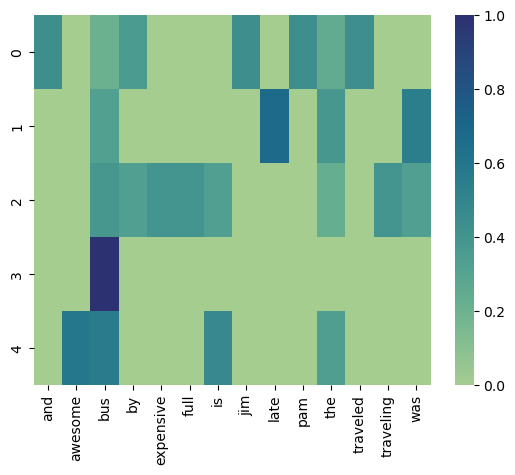

In [51]:
sns.heatmap(df_tfidf, cmap='crest')